In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 스케일로 조정
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

base_dir = '/content/drive/MyDrive/Colab Notebooks/ICT 이노베이션 스퀘어/05 11/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=12,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=4,
        class_mode='categorical')

Found 121 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('Batch size : ', data_batch.shape)
  print('Label size : ', labels_batch.shape)
  break

Batch size :  (12, 224, 224, 3)
Label size :  (12, 2)


In [ ]:
labels_batch

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
from keras.layers import Input, Dense, GlobalAveragePooling2D, Flatten
from keras.models import Model

from keras.applications.vgg16 import VGG16
from keras import layers
from keras import models

VGGNet = VGG16()
VGGNet.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in VGGNet.layers:
  layer.trainable = False # VGG안의 은닉층들의 가중치와 바이어스 업데이트 금지

In [ ]:
vgg_maxpool5 = VGGNet.get_layer('block5_pool').output

Feature_Flatten = Flatten()(vgg_maxpool5)
dense = Dense(32, name='FC', activation='relu')(Feature_Flatten)
predictions = Dense(2, activation='softmax')(dense)

New_VGGmodel = Model(inputs=VGGNet.input, outputs=predictions)
New_VGGmodel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

New_VGGmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
history = New_VGGmodel.fit_generator(
    train_generator,
    validation_data=validation_generator,
    validation_steps=10,
    steps_per_epoch=10,
    epochs=5
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
10/10 [==============================] - 78s 8s/step - loss: 3.0520 - accuracy: 0.4234 - val_loss: 0.7285 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 82s 8s/step - loss: 0.7575 - accuracy: 0.6089 - val_loss: 0.6659 - val_accuracy: 0.5000
Epoch 3/5
10/10 [==============================] - 77s 8s/step - loss: 0.5220 - accuracy: 0.7151 - val_loss: 0.4608 - val_accuracy: 0.7750
Epoch 4/5
10/10 [==============================] - 76s 8s/step - loss: 0.3993 - accuracy: 0.8783 - val_loss: 0.3886 - val_accuracy: 0.8250
Epoch 5/5
10/10 [==============================] - 77s 8s/step - loss: 0.3728 - accuracy: 0.8115 - val_loss: 0.3694 - val_accuracy: 0.8500


In [ ]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [ ]:
pip install flickrapi

In [ ]:
from flickrapi import FlickrAPI

FLICKER_KEY = '505e8c2b05e8b5aa51766a43fc4bc7a7'
FLICKER_SECRET = '46b3ef2f43b04ac6'

flickr = FlickrAPI(FLICKER_KEY, FLICKER_SECRET, format='parsed-json')
extras='url_s'
cats = flickr.photos.search(text='kitten', per_page=5, extras=extras)
photos = cats['photos']

In [ ]:
photos

{'page': 1,
 'pages': 27500,
 'perpage': 5,
 'photo': [{'farm': 66,
   'height_s': 180,
   'id': '51217107638',
   'isfamily': 0,
   'isfriend': 0,
   'ispublic': 1,
   'owner': '30098550@N00',
   'secret': '30081ef67a',
   'server': '65535',
   'title': "This cat is related. We just don't know how.",
   'url_s': 'https://live.staticflickr.com/65535/51217107638_30081ef67a_m.jpg',
   'width_s': 240},
  {'farm': 66,
   'height_s': 240,
   'id': '51217635984',
   'isfamily': 0,
   'isfriend': 0,
   'ispublic': 1,
   'owner': '8432872@N04',
   'secret': '264745f9b9',
   'server': '65535',
   'title': '5.30.21',
   'url_s': 'https://live.staticflickr.com/65535/51217635984_264745f9b9_m.jpg',
   'width_s': 180},
  {'farm': 66,
   'height_s': 127,
   'id': '51217919400',
   'isfamily': 0,
   'isfriend': 0,
   'ispublic': 1,
   'owner': '123300163@N04',
   'secret': '5850d4b9c3',
   'server': '65535',
   'title': 'Sharp Kitten',
   'url_s': 'https://live.staticflickr.com/65535/51217919400_5850d

In [ ]:
import numpy as np
import urllib
import cv2

def url_to_image(url):
  resp = urllib.request.urlopen(url)

  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

In [ ]:
photos['photo'][1]['url_s']

'https://live.staticflickr.com/65535/51217635984_264745f9b9_m.jpg'

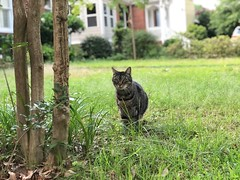

In [ ]:
from google.colab.patches import cv2_imshow

image_original_url = photos['photo'][0]['url_s']

image_temp = url_to_image(image_original_url)
cv2_imshow(image_temp)

In [ ]:
image_temp.shape

(180, 240, 3)

In [ ]:
resized_image = cv2.resize(image_temp, (224,224))
print(resized_image.shape)

(224, 224, 3)


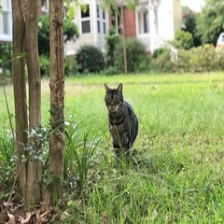

In [ ]:
cv2_imshow(resized_image)

In [ ]:
resized_image = np.expand_dims(resized_image, axis=0)
print(resized_image.shape)

(1, 224, 224, 3)


In [ ]:
result = New_VGGmodel.predict(resized_image)

In [ ]:
result

array([[1.8186259e-12, 1.0000000e+00]], dtype=float32)

In [ ]:
result = np.argmax(result)

In [ ]:
result

1

In [ ]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [ ]:
New_VGGmodel.save('MyVGGNet_210601.h5')

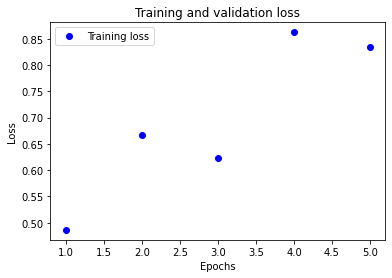

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
!ls

drive  MyVGGNet_210601.h5  sample_data
